In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
# Find the features which strongly affect price of house
df_numeric = df.select_dtypes(include = ['number'])
df_numeric.corr()['price'].sort_values(ascending = False)

,price
price,1.000000
area,0.535997
bathrooms,0.517545
stories,0.420712
parking,0.384394
bedrooms,0.366494


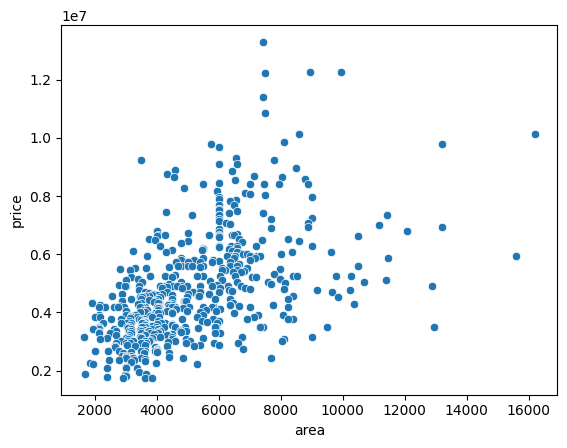

In [7]:
sns.scatterplot(x = 'area', y = 'price', data = df);

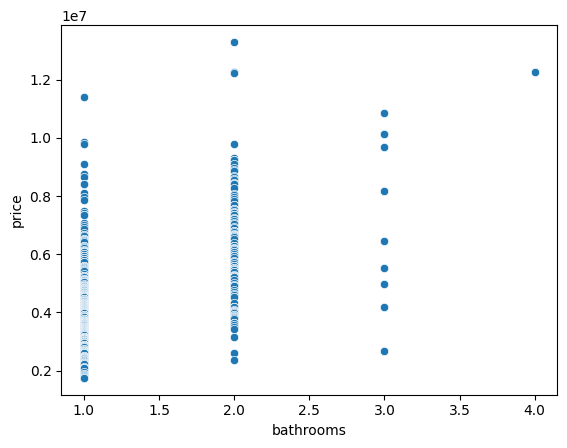

In [8]:
sns.scatterplot(x = 'bathrooms', y = 'price', data = df);

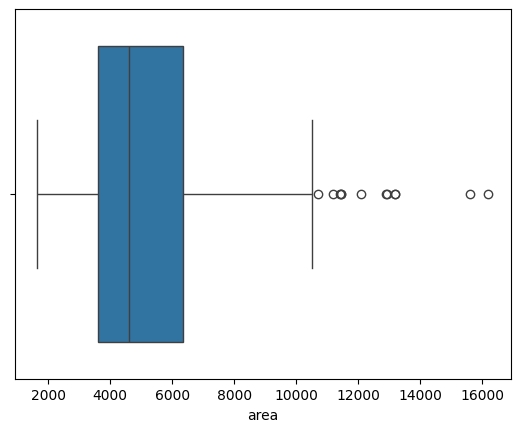

In [9]:
# Finding Outliers
sns.boxplot(x = 'area', data = df);

In [10]:
df[df['area'] > 11000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
211,4900000,12900,3,1,1,yes,no,no,no,no,2,no,furnished


In [11]:
q1, q3 = np.percentile(df['area'],[25,75])
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [12]:
print('upper Limit is',upper_limit)
print('Lower Limit is',lower_limit)

upper Limit is 10500.0
Lower Limit is -540.0


In [13]:
outlier_ind = df[(df['area'] > upper_limit) | (df['area'] < lower_limit)].index

In [14]:
df1 = df.drop(outlier_ind, axis = 0)

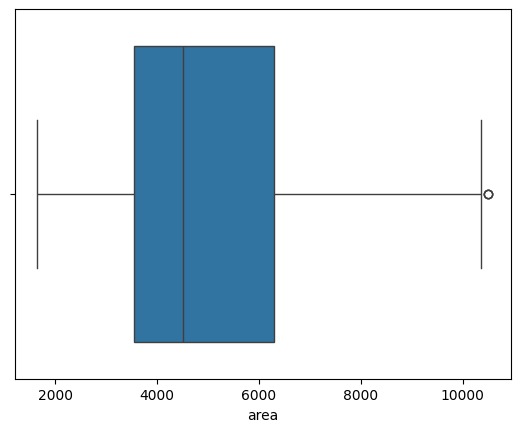

In [15]:
sns.boxplot(x = 'area', data = df1);

In [16]:
# Check For Null Values
df1.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [17]:
obj_fea_df1 = df1.select_dtypes(include = 'object')
obj_fea_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 544
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mainroad          533 non-null    object
 1   guestroom         533 non-null    object
 2   basement          533 non-null    object
 3   hotwaterheating   533 non-null    object
 4   airconditioning   533 non-null    object
 5   prefarea          533 non-null    object
 6   furnishingstatus  533 non-null    object
dtypes: object(7)
memory usage: 33.3+ KB


In [18]:
num_fea_df1 = df1.select_dtypes(exclude = 'object')
num_fea_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      533 non-null    int64
 1   area       533 non-null    int64
 2   bedrooms   533 non-null    int64
 3   bathrooms  533 non-null    int64
 4   stories    533 non-null    int64
 5   parking    533 non-null    int64
dtypes: int64(6)
memory usage: 29.1 KB


In [19]:
# Convert Categorical Data into Numeric data using pd.get_dummies
obj_dummies_feat = pd.get_dummies(obj_fea_df1, drop_first = True, dtype = int)
obj_dummies_feat.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0


In [20]:
final_df = pd.concat([num_fea_df1, obj_dummies_feat], axis = 1)
final_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [21]:
# Separate Target and Features
X = final_df.drop('price', axis = 1)
y = final_df['price']

In [22]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
# Import standard Scaler from preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Scale Xtrian and X_tes
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Without scaling R square is 0.60
# After scaling R square is 0.60

In [24]:
# Apply Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# R square for linear regression is 0.60

LinearRegression()

In [25]:
# Apply Ridge Cross Validation
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=(0.1, 1.0, 10.0))
model.fit(X_train, y_train)

# R square for Ridge cross validation is also 0.60

RidgeCV()

In [26]:
# Take Predictions
test_preds = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
MAE = mean_absolute_error(y_test, test_preds)
RMSE = root_mean_squared_error(y_test, test_preds)
R_sqr = r2_score(y_test, test_preds)

In [28]:
print('MAE is ', MAE)
print('RMSE is ', RMSE)
print('R_square is ',R_sqr)

MAE is  800206.1689592239
RMSE is  1127779.9802836832
R_square is  0.6034246387981175


In [1]:
# One more try 
a =10 
b = 20 
c = a + b
print(c)

30


In [ ]:
# 2 nd push for this branch